<a href="https://colab.research.google.com/github/Jasleen8801/Computational-Statistics/blob/main/Computational_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Common Functions Used

In [223]:
def mean(list):
  sum = 0
  for num in list:
    sum += int(num)
  avg = sum/len(list)
  return avg

In [224]:
def sum(list):
  sum = mean(list)*len(list)
  return sum

# 1) Linear Regression 

## Functions Used

In [225]:
def coeff(x, y):
  n = len(x)

  mean_x = mean(x)
  mean_y = mean(y)

  # b1_num = sum((x-mean_x)*(y-mean_y))
  # b1_den = sum((x-mean_x)**2)
  # b_1 = b1_num/b1_den

  SS_xy = sum(y*x) - n*mean_y*mean_x
  SS_xx = sum(x*x) - n*mean_x*mean_x

  b_1 = SS_xy / SS_xx
  b_0 = mean_y - b_1*mean_x

  return (b_0, b_1)

In [226]:
def plot_regr_line(x, y, b):
  plt.scatter(x, y, color="b")

  y_pred = b[0] + b[1]*x

  plt.plot(x, y_pred, color="r")

  plt.xlabel('x')
  plt.ylabel('y')

  plt.show()

In [227]:
def coeff_of_det(x, y):
  n = len(x)
  r2_num = (n*sum(x*y) - sum(x)*sum(y))**2
  r2_den = (n*sum(x*x) - (sum(x))**2) * (n*sum(y*y) - (sum(y))**2)
  r_2 = r2_num/r2_den
  return r_2

## Using Manual Calculations



#### Random Dataset

In [228]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([1,3,2,5,7,8,8,9,10,12])

In [229]:
b = coeff(x,y)
print("Estimated coefficients:\n b_0 = {}  \n b_1 = {}".format(b[0], b[1]))
print(f"Coefficient of Determination: {coeff_of_det(x,y)}")

Estimated coefficients:
 b_0 = 1.2363636363636363  
 b_1 = 1.1696969696969697
Coefficient of Determination: 0.952538038613988


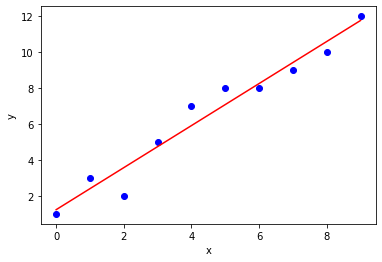

In [230]:
plot_regr_line(x, y, b)

#### Kaggle Dataset

In [231]:
data = pd.read_csv('Salary_Data.csv')
x = data['YearsExperience']
y = data['Salary']

In [232]:
b = coeff(x,y)
print("Estimated coefficients:\n b_0 = {}  \n b_1 = {}".format(b[0], b[1]))
print(f"Coefficient of Determination: {coeff_of_det(x,y)}")

Estimated coefficients:
 b_0 = 31650.50546021841  
 b_1 = 8990.370514820592
Coefficient of Determination: 1.2678138921682631


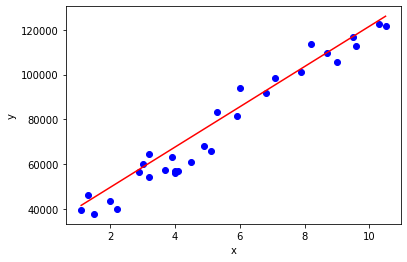

In [233]:
plot_regr_line(x, y, b)

## Using Inbuilt Functions

#### Random Dataset

In [234]:
x = np.array([0,1,2,3,4,5,6,7,8,9]).reshape((-1, 1))
y = np.array([1,3,2,5,7,8,8,9,10,12])

In [235]:
model = LinearRegression().fit(x, y)

In [236]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.952538038613988
intercept: 1.2363636363636363
slope: [1.16969697]


#### Kaggle Dataset

In [237]:
data = pd.read_csv('Salary_Data.csv')
x = np.array(data['YearsExperience']).reshape((-1, 1))
y = np.array(data['Salary'])

In [238]:
model = LinearRegression().fit(x, y)

In [239]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.9569566641435086
intercept: 25792.200198668696
slope: [9449.96232146]


# 2) Variance inflation factor (VIF)


## Functions Used

In [240]:
def VIF(x, y):
  R_2 = coeff_of_det(x,y)
  VIF_value = 1 / (1 - R_2)
  return VIF_value

In [241]:
def predicted(x, b0, b1):
  y_pred = b_0 + b_1*x
  return y_pred

In [242]:
def SSR(y_mean, y_pred):
  SSR_value = sum((y_mean - y_pred)**2)
  return SSR_value

In [243]:
def SST(y_mean, y_i):
  SST_value = sum((y_i - y_mean)**2)
  return SST_value

In [244]:
def SSE(y_pred, y_i):
  SSR_value = sum((y_i - y_pred)**2)
  return SSR_value

## Using Manual Calculations

#### Random Dataset

In [249]:
df = pd.DataFrame({'hours': [1, 1, 1, 2, 2, 2, 2, 2, 3, 3,
                             3, 4, 4, 4, 5, 5, 6, 7, 7, 8],
                   'score': [68, 76, 74, 80, 76, 78, 81, 84, 86, 83,
                             88, 85, 89, 94, 93, 94, 96, 89, 92, 97]})

y = df['score'].to_numpy()
x = df['hours'].to_numpy()

In [252]:
y_mean = mean(y)
b_0,b_1 = coeff(x,y)
y_pred = predicted(x, b_0, b_1)
# print(y_pred)

In [255]:
print(f"The SSR for the given model is: {SSR(y_mean, y_pred)}")
print(f"The SST for the given model is: {SST(y_mean, y)}")
print(f"The SSE for the given model is: {SSE(y_pred, y)}")
print(f"The VIF value is: {VIF(x, y)}")

The SSR for the given model is: 908.0
The SST for the given model is: 1239.0
The SSE for the given model is: 322.0
The VIF value is: 3.7712011914828465
